In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

In [9]:

p = Path(os.getcwd()).parents[2] #donne path vers fichier contenant data ( 3 level up d ici)
df=pd.read_csv(str(p)+"\\data\\f_ETHUSD_1.csv",)

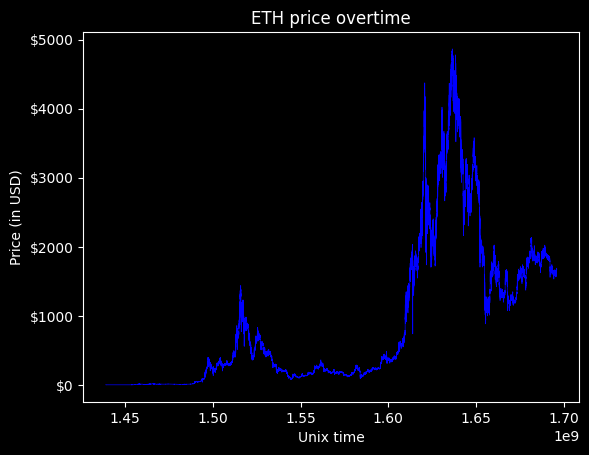

In [10]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Open"],linewidth=0.5,color="b")
plt.title("ETH price overtime")
plt.xlabel("Unix time")
plt.ylabel("Price (in USD)")
y_ticks=list(range(0,5001,1000))
plt.yticks(y_ticks,labels=[f"${tick}" for tick in y_ticks])
plt.show()

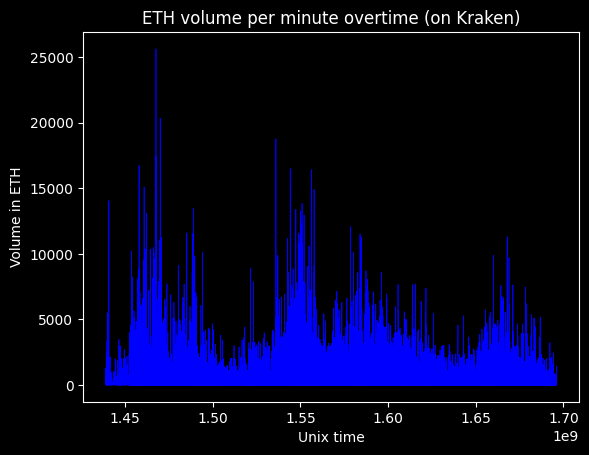

In [11]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Volume"],linewidth=0.5,color="b")
plt.title("ETH volume per minute overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Volume in ETH")
#y_ticks=list(range(0,19,2))
#plt.yticks(y_ticks,labels=[f"${tick}M" for tick in y_ticks])
plt.show()

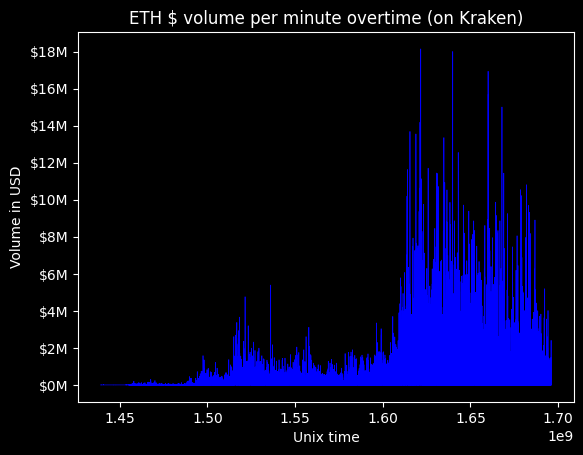

In [12]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Open"]*df["Volume"]/1000000,linewidth=0.5,color="b")
plt.title("ETH $ volume per minute overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Volume in USD")
y_ticks=list(range(0,19,2))
plt.yticks(y_ticks,labels=[f"${tick}M" for tick in y_ticks])
plt.show()

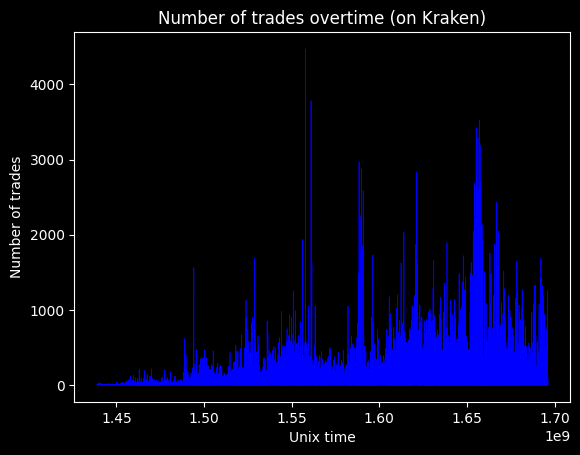

In [13]:
plt.style.use("dark_background")
plt.plot(df["Time"],df["Trades"],linewidth=0.5,color="b")
plt.title("Number of trades overtime (on Kraken)")
plt.xlabel("Unix time")
plt.ylabel("Number of trades")
plt.show()

In [14]:
df

,Time,Open,High,Low,Close,Volume,Trades
0,1438956180,3.00000,3.00000,3.00,3.00,81.857278,2
1,1438967940,3.00001,3.00001,3.00,3.00,42.073291,2
2,1439016180,3.00000,3.00000,3.00,3.00,0.400000,1
3,1439026260,2.00000,2.00000,2.00,2.00,125.000000,2
4,1439051400,1.20000,1.20000,1.20,1.20,54.759700,1
...,...,...,...,...,...,...,...
3000449,1696117980,1670.73000,1670.73000,1670.73,1670.73,0.209407,5
3000450,1696118040,1670.73000,1670.73000,1670.73,1670.73,5.331141,4
3000451,1696118100,1671.60000,1671.60000,1671.60,1671.60,0.394274,1
3000452,1696118220,1671.58000,1671.58000,1671.58,1671.58,0.014400,2
